In [1]:
import pandas as pd
import re
from konlpy.tag import Komoran
import json
import time
from collections import OrderedDict
import sys
from collections import defaultdict
from collections import Counter
import ujson
import wordcloud
import matplotlib.pyplot as plt
import mmap
import math
from collections import Counter

In [19]:
import os

In [2]:
komoran = Komoran()

In [3]:
def split_sentences(text):
    all_sentences = []
    lines = [line for line in text.strip().splitlines() if line.strip()]
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line.strip())
        all_sentences += sentences
    return all_sentences

def review_to_morph_anal(df, start, end) : 
    """
    input : array 형태의 review
    output :  큰 리스트 안에 작은 리스트 안에 형태소 분석 내용
    
    """
    
    result = []
    
    
    for idx, review in enumerate(df["review"][start : end]) : 
        splited_sentence = split_sentences(review)
        for splited in splited_sentence :
            if len(splited) == 0 :
                continue
            morph_sentence = komoran.pos(splited.strip())
            dic = {word: morph for word, morph in morph_sentence} 
        result.append(dic)    

    return result

def filter_morph_anal(morphemes) : 
    FEATURE_POSES = ["NNG", "NNP", "VV", "VA", "XR"]
    morph_anal = [(word, mor) for n in range(len(morphemes)) for word, mor in morphemes[n].items() if mor in FEATURE_POSES]
    return morph_anal

def get_word_counts_for_Noun(morph_anal) : 
    NOUNS = ["NNG", "NNP"]
    word_counts = [word[0] for word in morph_anal if word[1] in NOUNS]
    word_counts = {word : count for word, count in Counter(word_counts).items()}
    return word_counts

def get_word_counts_for_Adjective(morph_anal) : 
    ADJECTIVES = ["VV", "VA"]
    word_counts = [word[0] + "다" for word in morph_anal if word[1] in ADJECTIVES]
    word_counts = {word : count for word, count in Counter(word_counts).items()}
    return word_counts

def get_word_counts_for_Radix(morph_anal) : 
    RADIX = ["XR"]
    word_counts = [word[0] + "하다" for word in morph_anal if word[1] in RADIX]
    word_counts = {word : count for word, count in Counter(word_counts).items()}
    return word_counts

def build_cloud(word_counts, max_words) :
    ubuntu_font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
    font_path = "C:/Windows/Fonts/gulim.ttc"
    cloud_gen = wordcloud.WordCloud(font_path = ubuntu_font_path, max_words = max_words, collocations = False, \
                                   max_font_size = 80)
    cloud = cloud_gen.generate_from_frequencies(word_counts)
    return cloud

def get_cloud(cloud) : 
    plt.figure(figsize = (10, 10))
    plt.axis("off")
    plt.imshow(cloud, interpolation = 'bilinear')

In [40]:
def get_cloud_from_text(picture = True, condition = True) :
    site_name = input("which site reviews would you use? (Aritaum/GlowPick)")
    file_name = [file_name for file_name in os.listdir("./") if site_name in file_name and "csv" in file_name][0]
    reviews = pd.read_csv(file_name)
    if condition : 
        whole_sentence = input("input whole sentence for getting filtered dataframe ")
        reviews = eval(whole_sentence)
    
    morph_sentence = review_to_morph_anal(reviews, 0, len(reviews))
    filtered_morph_sentence = filter_morph_anal(morph_sentence)
    noun_count = get_word_counts_for_Noun(filtered_morph_sentence)
    adjective_count = get_word_counts_for_Adjective(filtered_morph_sentence)
    radix_count = get_word_counts_for_Radix(filtered_morph_sentence)

    kind_of_count = input("which kind of word count woud you see? (noun_count/adjective_count/radix_count)")
    ready_for_cloud = build_cloud(eval(kind_of_count), 40)
    fig = plt.figure(figsize = (10, 10))
    plt.axis("off")
    plt.imshow(ready_for_cloud, interpolation = 'bilinear')
    plt.show()

    if picture : 
        fig.savefig(site_name + "_" + kind_of_count + "_without_axisoff.png")

which site reviews would you use? (Aritaum/GlowPick)GlowPick
input whole sentence for getting filtered dataframe reviews[reviews["rating"] < 5]
which kind of word count woud you see? (noun_count/adjective_count/radix_count)adjective_count


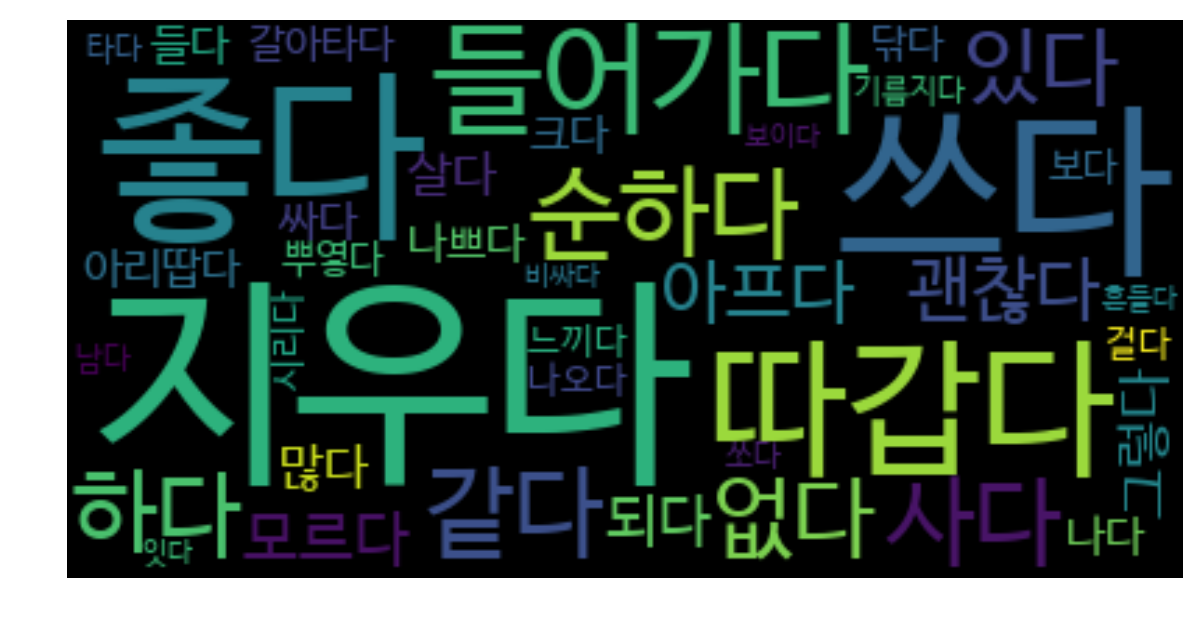

In [42]:
get_cloud_from_text(picture = True)